#### Author
Yury Kashnitsky

#### Reference
[Notion ticket](https://www.notion.so/a74951e4e815480584dea7d61ddce6cc?v=dbfdb1207d0e451b827d3c5041ed0cfd&p=e67a0a723a964be29b138918aed7887b)

#### Idea
Explore model errors w.r.t.. to the 400 hand-labeled titles from RSS feeds

#### Data
400 news titles along with metadata – zipped pwd-protected [CSV file](https://drive.google.com/file/d/1cLXHBzZjHWjOIU52w8MnpzZU6vKEiUs8/view?usp=sharing) (not to be shared outside of the project)

#### Result
Key insights:

 - Accuracy is just slightly over 50%
 - Model errors are typically confirmed when compared to human labels: either the model is indeed wrong, or the case is controversial 
 - There are 5 feeds with at least 10 news seen and accuracy <50% but the news from these sources don't look like rubbish

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../data/labeled_news_titles_400_upto_20220715.csv', index_col='title_id')

In [3]:
df.head()

,title,source,pub_time,negative,neutral,positive,predicted_class,label,annot_time
title_id,,,,,,,,,
1.257979e+09,Hester Peirce Urges The SEC To Stop Delaying A...,https://www.dcforecasts.com/feed/,2022-06-19 16:40:04,0.796737,0.075519,0.127744,0,2,2022-06-20 07:14:11
2.575180e+08,California Man Paid $13K In BTC To A Hitman To...,https://www.dcforecasts.com/feed/,2022-06-19 16:23:41,0.978666,0.009866,0.011468,0,0,2022-06-20 07:19:25
1.971236e+09,Bitcoin’s Dominance Over Altcoins Down By 5% A...,https://www.dcforecasts.com/feed/,2022-06-19 16:20:04,0.981520,0.006293,0.012187,0,1,2022-06-20 07:20:10
-1.733311e+09,Litecoin aims to hold $40 support and stop fur...,https://bitcoinwarrior.net/feed/,2022-06-20 14:48:46,0.056126,0.037808,0.906066,2,2,2022-06-20 07:18:40
-1.039760e+09,Cumberland Sees Massive OTC Moves During Crypt...,https://news.bitcoin.com/feed/,2022-06-19 18:00:17,0.048167,0.060548,0.891285,2,0,2022-06-20 07:18:30


In [4]:
df['correct_pred'] = (df['predicted_class'] == df['label']).astype('uint8')

In [5]:
df['correct_pred'].mean()

0.5125

In [6]:
print(classification_report(y_true=df['label'], y_pred=df['predicted_class']))

              precision    recall  f1-score   support

           0       0.48      0.63      0.55        98
           1       0.78      0.41      0.53       229
           2       0.33      0.68      0.44        73

    accuracy                           0.51       400
   macro avg       0.53      0.57      0.51       400
weighted avg       0.63      0.51      0.52       400



In [7]:
pd.crosstab(df['predicted_class'], df['label'])

label,0,1,2
predicted_class,,,
0,62,55,11
1,14,93,12
2,22,81,50


## Exploring model errors

__Predicted as negative and labeled as positive__

In [8]:
df.loc[(df['predicted_class'] == 0) & (df['label'] == 2), 'title'].tolist()

['Hester Peirce Urges The SEC To Stop Delaying Approval Of ETFs',
 "'Can't stop, won't stop' — Bitcoin hodlers buy the dip at $20K BTC",
 'Crypto Market Deleveraging Might Soon End, JPMorgan Argues',
 'Singapore regulators to protect retail traders from risky crypto trading activities',
 'Qatar Doubles Down on its CBDC Plans',
 'Coinbase NFT Released New Features While Struggling To Attract Traders',
 'CryptoCom CEO Denies Imposing Withdrawal Restrictions',
 'Argentines Take Refuge in Stablecoins After Economy Minister Resignation',
 'Binance Becomes First Exchange to Cut Bitcoin Trading Fees',
 'Anchorage launches Ethereum staking for institutional investors',
 '‘Cheaper than it looks:’ Fidelity exec says BTC undervalued and oversold']

Comments
 - "Hester Peirce Urges The SEC To Stop Delaying Approval Of ETFs" - the model got it wrong, "stop delaying" is a positive thing
 - "'Can't stop, won't stop' — Bitcoin hodlers buy the dip at $20K BTC" – someone is buying BTC at the dip, thus believing in BTC, the label is correct, the model got it wrong
 - "Crypto Market Deleveraging Might Soon End, JPMorgan Argues" – would mark it as neutral now
 - "Singapore regulators to protect retail traders from risky crypto trading activities" – it's about protecting traders, positive, the model is wrong
 - "Qatar Doubles Down on its CBDC Plans" - CBDC stands for "Central bank digital currencies", to "double down" means to act twice more actively, the news is positive, and the model is wrong
 - "Coinbase NFT Released New Features While Struggling To Attract Traders" - hard, controversial case, also relates to NFTs rather than to cryptocurrencies
 - "CryptoCom CEO Denies Imposing Withdrawal Restrictions" - controversial, it's bad that there are such rumors but good that CEO denies them
 - "Argentines Take Refuge in Stablecoins After Economy Minister Resignation" – that's clearly positive, the model is wrong
 - "Binance Becomes First Exchange to Cut Bitcoin Trading Fees" - clearly positive, the model is wrong, probably attended to "cut"
 - "Anchorage launches Ethereum staking for institutional investors" – sounds like neutral or positive but not negative, the model is wrong
 - "'Cheaper than it looks:' Fidelity exec says BTC undervalued and oversold" – Fidelity exec thinks that BTC should cost more, looks positive

__Predicted as positive and labeled as negative__

In [9]:
df.loc[(df['predicted_class'] == 2) & (df['label'] == 0), 'title'].tolist()

['Cumberland Sees Massive OTC Moves During Crypto Market Rout — ‘Most Volume We’ve Seen This Year’',
 'CoinFlex CEO: Restoring Withdrawals Could Take More Time Than Expected',
 'EU agrees on MiCA regulation to crack down on crypto and stablecoins',
 'CoinFLEX reveals Roger Ver as the counterparty responsible for its liquidity issues',
 'Celsius Acquires More Advisors to Help With Bankruptcy',
 'CoinLoan Reduces Withdrawal Limits but Claims No Exposure to Luna, Celsius, 3AC',
 'Deutsche Bank Strategists Reveal The Real Reason Crypto Free Fall Is Likely To Continue',
 'Crypto Market Liquidations Surges Past $250 Million As Bitcoin Declines Below $20,000',
 'FTX Plans to Close on Buying BlockFi But Not Celsius Mess',
 'FinTech Acquisition Corp Calls Off Merger With eToro: Report',
 "Crypto Miner Core Scientific Dumps $165M Bitcoin to 'Enhance Liquidity'",
 '“Bitcoin miners sell-off” is not over yet!\xa0JPMorgan Chase: May last until the third quarter',
 'Confusion In The Community Enhance

Comments:
 - "Cumberland Sees Massive OTC Moves During Crypto Market Rout — ‘Most Volume We’ve Seen This Year’" - that's about people panicking, clearly negative, the model is wrong, probably attended to "Most Volume We’ve Seen This Year"
 - "CoinFlex CEO: Restoring Withdrawals Could Take More Time Than Expected" - bad, the model is wrong, probably attended to "More Time"
 - "EU agrees on MiCA regulation to crack down on crypto and stablecoins" - clearly negative, the model is wrong
 - "CoinFLEX reveals Roger Ver as the counterparty responsible for its liquidity issues" - sounds neutral actually
 - "CoinLoan Reduces Withdrawal Limits but Claims No Exposure to Luna, Celsius, 3AC" – bad, the model is wrong
 - "Deutsche Bank Strategists Reveal The Real Reason Crypto Free Fall Is Likely To Continue" – bad, the model is wrong

## Exploring accuracy vs. prediction confidence

In [10]:
df['max_pred_score'] = df[['negative', 'neutral', 'positive']].max(axis=1)

Max predicted score distributions are similar when predictions are correct and when they are wrong

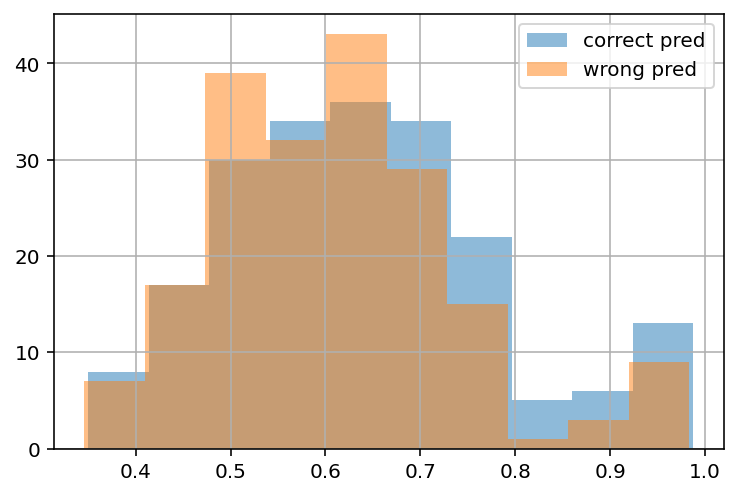

In [11]:
df.loc[df['correct_pred'] == 1, 'max_pred_score'].hist(alpha=0.5, label='correct pred');
df.loc[df['correct_pred'] == 0, 'max_pred_score'].hist(alpha=0.5, label='wrong pred')
plt.legend();

In [12]:
bins = np.linspace(0.3, 1, 8)
df['max_pred_score_bin'] = pd.cut(df['max_pred_score'], bins)

In [13]:
df.groupby('max_pred_score_bin')['correct_pred'].mean()

max_pred_score_bin
(0.3, 0.4]    0.533333
(0.4, 0.5]    0.508475
(0.5, 0.6]    0.453704
(0.6, 0.7]    0.461538
(0.7, 0.8]    0.621212
(0.8, 0.9]    0.750000
(0.9, 1.0]    0.629630
Name: correct_pred, dtype: float64

Accuracy of predictions slightly increases when max predicted scores are higher (i.e. when the model is "confident")

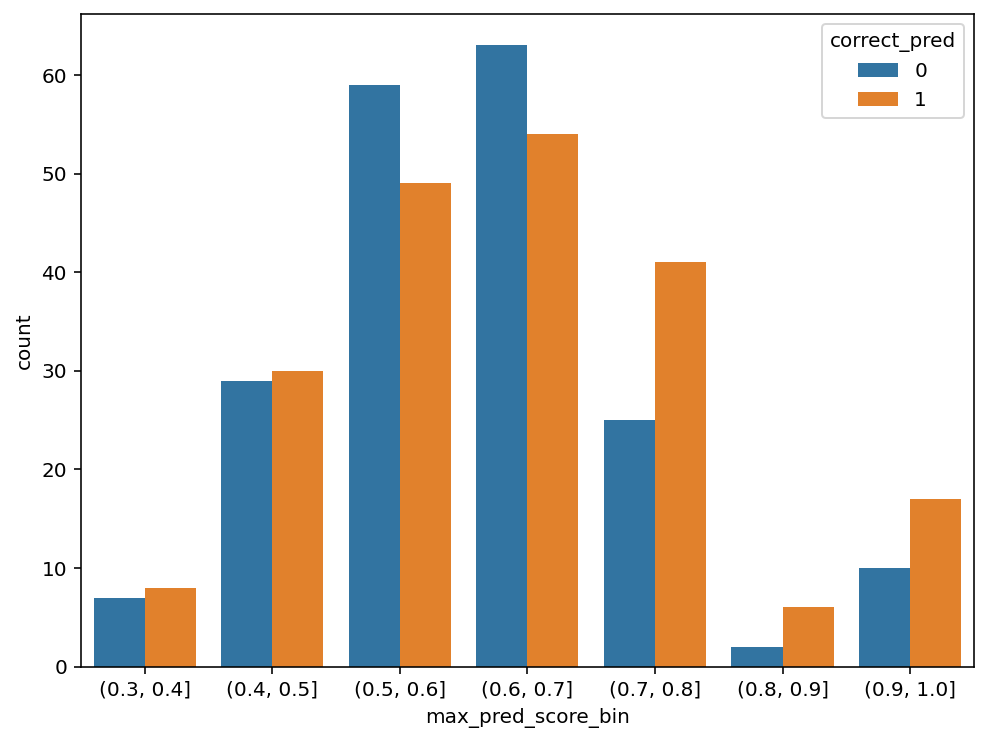

In [14]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='max_pred_score_bin', hue='correct_pred', data=df);

## Exploring accuracy vs. news source

In [15]:
df['source'].value_counts()

https://cointelegraph.com/feed                                           64
https://investing-api-eng.ambcrypto.com/feed/merge_category              46
https://insidebitcoins.com/feed                                          33
https://news.bitcoin.com/feed/                                           30
https://bitcoinwarrior.net/feed/                                         29
https://www.dcforecasts.com/feed/                                        25
https://cryptopotato.com/feed                                            24
https://www.helenabitcoinmining.com/feed/                                22
https://decrypt.co/feed                                                  17
https://www.tronweekly.com/feed/                                         14
https://zycrypto.com/feed/                                               14
https://coinjournal.net/feed/                                            13
http://bitcoinist.com/feed/                                              12
https://www.

In [16]:
sources_seen_at_least_10x = df['source'].value_counts()[np.where(df['source'].value_counts() > 10)[0]].index

In [17]:
df[df['source'].isin(sources_seen_at_least_10x)].groupby('source')['correct_pred'].mean().sort_values(ascending=False)

source
https://news.bitcoin.com/feed/                                 0.600000
https://decrypt.co/feed                                        0.588235
https://www.dcforecasts.com/feed/                              0.560000
https://bitcoinwarrior.net/feed/                               0.551724
https://www.investorideas.com/rss/feeds/iimain.xml             0.545455
https://cointelegraph.com/feed                                 0.531250
https://insidebitcoins.com/feed                                0.515152
https://www.tronweekly.com/feed/                               0.500000
https://zycrypto.com/feed/                                     0.500000
https://investing-api-eng.ambcrypto.com/feed/merge_category    0.478261
https://coinjournal.net/feed/                                  0.461538
https://cryptopotato.com/feed                                  0.458333
https://www.helenabitcoinmining.com/feed/                      0.454545
http://bitcoinist.com/feed/                              

In [18]:
df[df['source'].isin(sources_seen_at_least_10x)].groupby('source')['correct_pred'].mean().sort_values(ascending=False).index[-5:]

Index(['https://investing-api-eng.ambcrypto.com/feed/merge_category',
       'https://coinjournal.net/feed/', 'https://cryptopotato.com/feed',
       'https://www.helenabitcoinmining.com/feed/',
       'http://bitcoinist.com/feed/'],
      dtype='object', name='source')

5 sources are classified with <50 accuracy:

|                          **Source**                         | **#news seen** | **#news correctly classified** |
|:-----------------------------------------------------------:|:--------------:|:------------------------------:|
| http://bitcoinist.com/feed/                                 |       12       |                3               |
| https://coinjournal.net/feed/                               |       13       |                6               |
| https://cryptopotato.com/feed                               |       24       |               11               |
| https://investing-api-eng.ambcrypto.com/feed/merge_category |       46       |               22               |
| https://www.helenabitcoinmining.com/feed/                   |       22       |               10               |

Looking at the content of these 5 sources, I can't say that the are rubbish

In [19]:
df.loc[df['source'] == 'http://bitcoinist.com/feed/', 'title'].tolist()

['‘Cryptoqueen’ Has A $100,000 Bounty On Her Head Offered By The FBI',
 'Crypto Market Liquidations Surges Past $250 Million As Bitcoin Declines Below $20,000',
 'BlockFi Increased Deposit Rates And Removed Free Withdrawals, Here’s What We Know',
 'Cosmin Mesenschi of FirstByte Media Explains How The Company Remains A Driving Force Behind Crypto Companies',
 'Why This Bitcoin Miner Giant Sold 3,000 BTC Over The Past Week',
 'Morgan Creek Said To Be In Bid To Secure $250-M To Counter FTX BlockFi Bailout',
 'Step App: Using Blockchain to Reimagine Fitness',
 'Gone Phishing: Cardano Ranks 3rd On List Of Most-Phished Crypto Projects',
 'Plugin & Sumunnati, Agri-Insurance Amplified Through Climatic Variables',
 'Bank For International Settlements Explains MEV & Ethereum Market Manipulation',
 'South African Crypto Investors Heavily Rely On Social Media For Industry Information, KuCoin Report Shows',
 'CBDC Cybersecurity To Be Tested By Hong Kong, Bank Of Israel And Bank For Int’l Settlement

In [20]:
df.loc[df['source'] == 'https://coinjournal.net/feed/', 'title'].tolist()

['Axie Infinity to enter Phase 2 today after its Origin patch',
 'NFT games on brink of overtaking PC games in popularity',
 'Floyd Mayweather sums up everything that is wrong with crypto',
 'Sell XRP/USD as price stalls for a chance to buy lower or buy on a break above',
 'ADA eyes a breakout as developers release the final node for the Vasil hard fork',
 'Meta rolls out tools to help select creators make money on Facebook and Instagram',
 'Bitcoin is a commodity, says SEC’s Gary Gensler',
 'Highlights June 28: Chiliz rallies on Ronaldo partnership with Binance',
 'DOGE runs out of steam, traders turn to larger market cap coins',
 'The bear markets are for building, says Fireblock’s CEO',
 'Crypto is not replacing the U.S. dollar, says BitFury CEO',
 'Crypto lender Celsius hires ‘Restructuring Lawyers’: CEL price pumps and dumps',
 'BNB Chain burns $772M worth of BNB']

In [21]:
df.loc[df['source'] == 'https://cryptopotato.com/feed', 'title'].tolist()

['Fed Views Stablecoins as a Financial Instablity, Urges Regulators to Step in',
 'CoinFlex CEO: Restoring Withdrawals Could Take More Time Than Expected',
 'Crypto Market Deleveraging Might Soon End, JPMorgan Argues',
 'Binance Partners With Cambodian Regulators to Develop a Local Regulatory Framework',
 'CoinLoan Reduces Withdrawal Limits but Claims No Exposure to Luna, Celsius, 3AC',
 'Huobi’s Founder Li Lin Reportedly Looking to Sell His Stake',
 'Optimism’s Quixotic Hacked, Promises to Reimburse All Affected Users',
 'Indian Crypto Excange CoinDCX Extends Withdrawal Restrictions to Meet Compliance Requirements',
 'Qatar Doubles Down on its CBDC Plans',
 'CryptoCom CEO Denies Imposing Withdrawal Restrictions',
 'FTX’s CEO Denies Rumors of Planning to Buy Robinhood',
 'Hedge Funds Reportedly Shorting USDT With Hudreds of Millions: Tether CTO Responds',
 'Celsius Denies Reports That Company CEO Alex Mashinsky Tried to Leave the US',
 '1% of DAO Members Controlling 90% Voting Power: C

In [22]:
df.loc[df['source'] == 'https://investing-api-eng.ambcrypto.com/feed/merge_category', 'title'].tolist()

['Solana [SOL] might see an extended decline unless the bulls...',
 'Was Convex Finance targeted in the latest spoofing exploit',
 'What of Ethereum now that $1.4B worth of ETH are sold',
 'AscendEX lists Walken (WLKN): A leading ‘Walk-to-Earn’ game',
 'Monero [XMR] traders need to be wary of this before placing calls',
 'ATOM: Assessing the odds of a long-term downtrend prevailing',
 "Why Ethereum investors remain uncertain despite ETH's 9% gains",
 'OpenSea Ethereum, Polygon report card for June; stats might shock you',
 'Bitcoin [BTC]: Miners may be capitulating, but is that all there is to it',
 'Solana [SOL]: Rebound from median of Pitchfork can open doorways for...',
 'Can Celsius hold on after its $120M repayment triggered a CEL mini-rally',
 'As Tron marks its fourth anniversary, this is what investors need to know about TRX',
 "With Loopring [LRC] flashing green, is Q2's turbulence behind it",
 'Can MoonBirds fly amid the tittle-tattle of drawdowns',
 "Dogecoin: Could new repo

In [23]:
df.loc[df['source'] == 'https://www.helenabitcoinmining.com/feed/', 'title'].tolist()

["Solana DeFi Platform Votes to Control Whale Account in Bid to Avoid Liquidation 'Chaos'",
 'Bitcoin Derivatives Exchange Reserve Surges Up As BTC Continues To Plunge',
 'Hurry Up With Crypto ID Checks, FATF Tells Countries',
 'TeraWulf Adds $50M in Debt for Datacenter Completions',
 'UK Government Seeks Views on DeFi Taxation',
 'Monero’s Ricardo ‘Fluffypony’ Spagni to Surrender to US Marshals on July 5',
 'New Bitcoin Record Paints Incredibly Bearish Picture As BTC Struggles At $19,000',
 'Blue Chip NFTs 101: The World Of Women Collection, Including And Conquering',
 'Grayscale Remains ‘Unequivocally Committed’ to Converting GBTC to an ETF',
 "Qatar at 'Foundation Stage' of CBDC Exploration, Central Bank Governor Says",
 'Final Toncoin Mined Ahead of Transition to Proof-of-Stake',
 'Cardano (ADA) Looks To Recover After Sliding To $0.43 – Pressure’s On For The Bulls',
 'Riot Blockchain Starts Move Away From New York Hosting Site',
 'Bitcoin Approaches 2018 Like Drawdown, Why $20,000 